<a href="https://colab.research.google.com/github/men-ka/data-science-111/blob/main/day6_textanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

In [ ]:
# Load data
url = "https://drive.google.com/uc?id=1bybQ1r-oXo7Zlf8f-aPCggyVRGs378PS&export=download"
df = pd.read_csv(url)


In [ ]:
print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [ ]:
# Clean descriptions
df['Description'] = df['Description'].astype(str).str.lower()
df['Description'] = df['Description'].str.replace(f"[{string.punctuation}]", "", regex=True)


In [ ]:
# Add new features
df['desc_word_count'] = df['Description'].str.split().str.len()

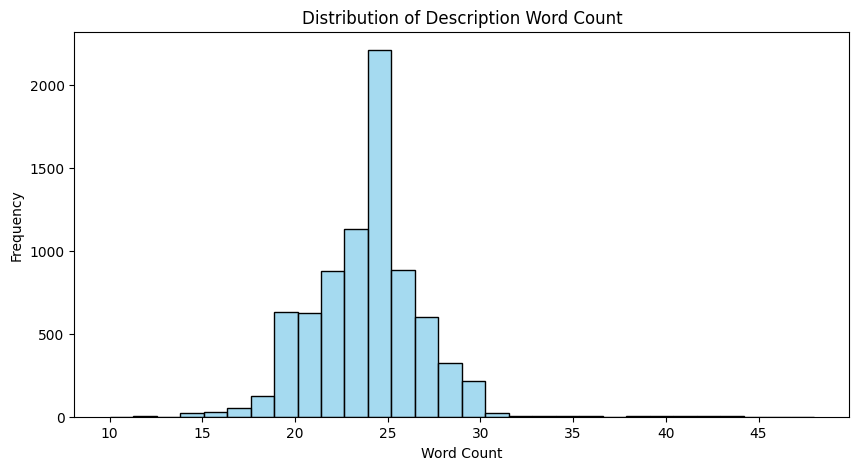

In [ ]:
# Plot distribution of description lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['desc_word_count'], bins=30, color='skyblue')
plt.title("Distribution of Description Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

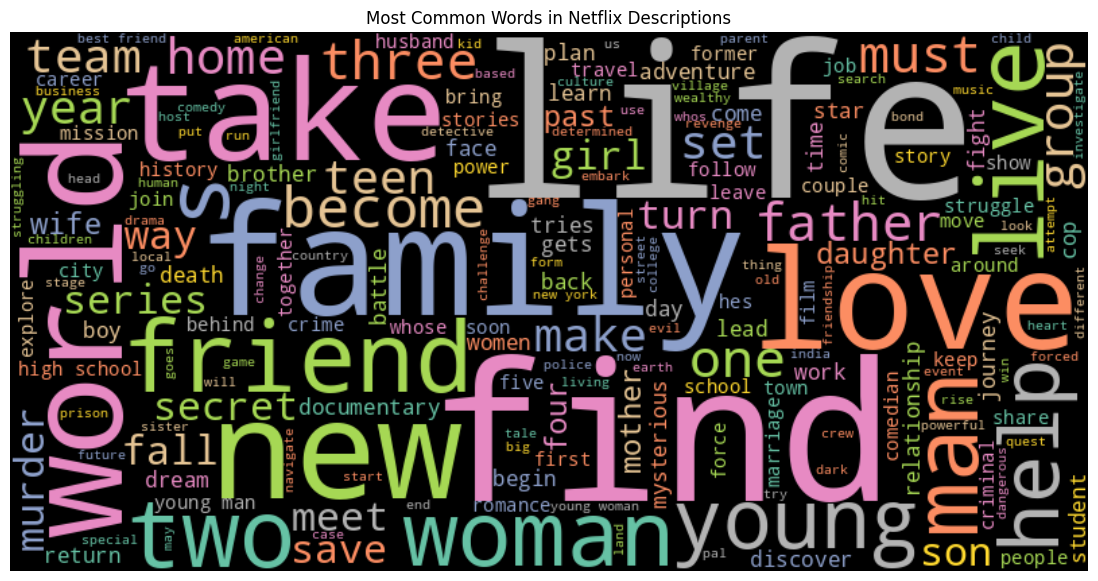

In [ ]:
text = " ".join(desc for desc in df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Descriptions")
plt.show()
